In [1]:
import numpy, pandas

In [2]:
import scipy, scipy.signal, scipy.optimize

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [4]:
input_file = '230117_Arnar.lfq.proteins_From_Gudrun.xlsx'
df = pandas.read_excel(input_file)
df.shape

(7841, 88)

In [5]:
labels = []
for element in df.columns:
    if 'ADRNOR_4H_' in element:
        labels.append(element)
    if 'CTRL_4H_' in element:
        labels.append(element)
    if 'ADRNOR_24H_' in element:
        labels.append(element)
    if 'CTRL_24H_' in element:
        labels.append(element)

working_labels=['adr4_a', 'adr4_b', 'adr4_c', 'ctl4_a', 'ctl4_b', 'ctl4_c', 'adr24_a', 'adr24_b', 'adr24_c', 'ctl24_a', 'ctl24_b', 'ctl24_c']
for i in range(12):
    print(working_labels[i], '\t', labels[i*2], labels[(i*2)+1])
    df.insert(0, 
              working_labels[i], 
              df.loc[:, [labels[i*2], labels[(i*2)+1]]].median(axis=1))

print(df.loc[:, 'ctl24_c'])
print(df.loc[:, ['CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']])

adr4_a 	 ADRNOR_4H_1_1_2792 Area ADRNOR_4H_1_2_2793 Area
adr4_b 	 ADRNOR_4H_2_1_2795 Area ADRNOR_4H_2_2_2796 Area
adr4_c 	 ADRNOR_4H_3_1_2798 Area ADRNOR_4H_3_2_2799 Area
ctl4_a 	 CTRL_4H_1_1_2752 Area CTRL_4H_1_2_2753 Area
ctl4_b 	 CTRL_4H_2_1_2755 Area CTRL_4H_2_2_2756 Area
ctl4_c 	 CTRL_4H_3_1_2758 Area CTRL_4H_3_2_2759 Area
adr24_a 	 ADRNOR_24H_1_1_2931 Area ADRNOR_24H_1_2_2932 Area
adr24_b 	 ADRNOR_24H_2_1_2934 Area ADRNOR_24H_2_2_2935 Area
adr24_c 	 ADRNOR_24H_3_1_2937 Area ADRNOR_24H_3_2_2938 Area
ctl24_a 	 CTRL_24H_1_1_2840 Area CTRL_24H_1_2_2841 Area
ctl24_b 	 CTRL_24H_2_1_2843 Area CTRL_24H_2_2_2844 Area
ctl24_c 	 CTRL_24H_3_1_2846 Area CTRL_24H_3_2_2847 Area
0       122919.07000
1        69911.99500
2         1436.45775
3        16612.29600
4         1099.22090
            ...     
7836      2174.96395
7837      2356.92770
7838      1411.05745
7839       265.90055
7840    124825.44300
Name: ctl24_c, Length: 7841, dtype: float64
      CTRL_24H_3_1_2846 Area  CTRL_24H_3_2_2847

In [6]:
# there are 2,074 duplicated measurements
print(df.shape)

duplicate_rows = df.duplicated(subset=working_labels)
print(sum(duplicate_rows))

df.drop_duplicates(subset=working_labels, inplace=True)
print(df.shape)

(7841, 100)
2073
(5768, 100)


In [7]:
expression = df.loc[:, working_labels]
expression

,adr4_a,adr4_b,adr4_c,ctl4_a,ctl4_b,ctl4_c,adr24_a,adr24_b,adr24_c,ctl24_a,ctl24_b,ctl24_c
0,65495.316500,85802.715000,107049.96800,74730.060000,58426.502000,79745.793000,95446.55000,107321.720000,92719.79000,93315.585000,94285.127000,122919.07000
1,37783.377000,45287.551000,71625.20500,60713.177000,49429.075000,51736.767500,60278.83600,51300.153000,70530.63250,85968.158000,77531.267500,69911.99500
2,1248.864050,1276.184400,665.27760,1023.670450,1008.338200,586.370725,621.08355,1314.238250,976.91325,1193.317125,764.650605,1436.45775
3,54415.652000,58750.342500,9318.80320,54141.580500,35658.565000,56442.270000,20280.72750,45122.106500,33279.36900,18966.433500,16857.171000,16612.29600
4,343.877655,487.092185,919.51117,280.563810,314.254565,353.206300,866.44315,765.353415,575.28780,811.901880,1266.959800,1099.22090
...,...,...,...,...,...,...,...,...,...,...,...,...
7829,9843.608000,14446.912500,20861.16600,16086.047000,8270.269550,13560.721500,32473.35000,12309.869500,12275.09050,21112.132000,14338.070000,21656.27150
7832,2119.290400,1671.020650,1245.87550,3188.437250,2184.048250,2554.703250,1177.93965,1300.223300,1639.93450,1183.416025,1557.551150,1125.42898
7834,845.612725,1475.588700,64.74116,799.086235,2341.668950,1643.316650,1493.64315,1872.925000,1176.17315,768.291970,246.896375,1365.90435
7836,1514.782000,1643.146050,3810.24865,2836.439200,1851.847300,2656.190300,2511.21670,1715.086950,1418.04345,1688.109150,3146.550350,2174.96395


['adr4_a', 'adr4_b', 'adr4_c']
(5768, 5)
(5765, 5)

115
['ctl4_a', 'ctl4_b', 'ctl4_c']
(5768, 5)
(5756, 5)

115
['adr24_a', 'adr24_b', 'adr24_c']
(5768, 5)
(5763, 5)

115
['ctl24_a', 'ctl24_b', 'ctl24_c']
(5768, 5)
(5759, 5)

115


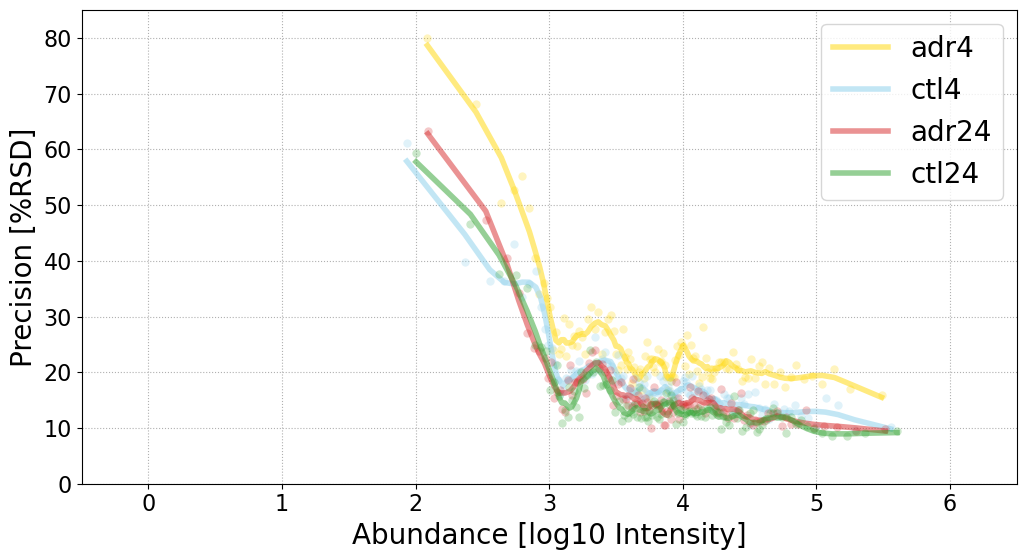

In [14]:
root_labels = ['adr4', 'ctl4', 'adr24', 'ctl24']
line_colors = ['gold', 'skyblue', 'tab:red', 'tab:green']

for i in range(len(root_labels)):
    
    root_label = root_labels[i]
    line_color = line_colors[i]
    
    working_labels = [element for element in expression.columns if root_label in element]
    print(working_labels)

    wdf = expression[working_labels]
    mean = numpy.mean(wdf, axis=1)
    std = numpy.std(wdf, axis=1)
    wdf.insert(0, 'mean', mean)
    wdf.insert(0, 'std', std) 

    print(wdf.shape)
    wdf = wdf[wdf['mean'] > 0]
    print(wdf.shape)
    
    wdf = wdf.sort_values('mean')
    print()

    cv = wdf['std'] / wdf['mean']
    cvi = (1 + (1/12))*cv
    wdf.insert(0, 'cv', cvi) # check wikipedia for an unbiased estimator

    wdf.insert(0, 'log_mean', numpy.log10(wdf['mean']))
    wdf.insert(0, 'log_cv', numpy.log10(wdf['cv']))
    

    x = []; y = []
    a = []; b = []
    for index, row in wdf.iterrows():
    
        a.append(row['mean'])
        b.append(row['cv']*100)
        if len(b) == 50:
            x.append(numpy.log10(numpy.mean(a)))
            y.append(numpy.mean(b))
            a = []; b = []
    print(len(x))
    matplotlib.pyplot.plot(x, y, 'o', lw=2, alpha=1/4, color=line_color, mec='none')
    yhat = scipy.signal.savgol_filter(y, 21, 5)
    matplotlib.pyplot.plot(x, yhat, '-', lw=4, alpha=1/2, label=root_label, color=line_color)

matplotlib.pyplot.legend()
matplotlib.pyplot.xlim(-0.5, 6.5)
matplotlib.pyplot.ylim(0, 85)
matplotlib.pyplot.xlabel('Abundance [log10 Intensity]')
matplotlib.pyplot.ylabel('Precision [%RSD]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()